## Logistic regression, Support vector machine, KNN, Desion Tree, Stacking and Bagging 
### Build a model with proper EDA,Fine Tunning , why we have to take the value, Use each and every parameter that is given inside the model with respect to class and object, 
#### Give and deatils for each and every model parameter , why we have used it.
##### Then build model and then deploy on AWS, Azore, Heroku and GCP 
###### How you are selecting ROC and AUC Curve, How You are calculating model is not overfitted 

In [50]:
import pandas as pd 
import glob

import numpy as np
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score , confusion_matrix , roc_auc_score , roc_curve
from pandas_profiling import ProfileReport
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import requests
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [2]:
#find all files in the S1_Dataset. Note:- remove the readme file.
path=r'/Users/ekcs011/Desktop/Datasets_Healthy_Older_People/S1_Dataset'
all_files=glob.glob(path+'/*')
print(all_files)


['/Users/ekcs011/Desktop/Datasets_Healthy_Older_People/S1_Dataset/d1p51F', '/Users/ekcs011/Desktop/Datasets_Healthy_Older_People/S1_Dataset/d1p18F', '/Users/ekcs011/Desktop/Datasets_Healthy_Older_People/S1_Dataset/d1p12F', '/Users/ekcs011/Desktop/Datasets_Healthy_Older_People/S1_Dataset/d2p11F', '/Users/ekcs011/Desktop/Datasets_Healthy_Older_People/S1_Dataset/d1p52F', '/Users/ekcs011/Desktop/Datasets_Healthy_Older_People/S1_Dataset/d1p38M', '/Users/ekcs011/Desktop/Datasets_Healthy_Older_People/S1_Dataset/d1p34F', '/Users/ekcs011/Desktop/Datasets_Healthy_Older_People/S1_Dataset/d2p12F', '/Users/ekcs011/Desktop/Datasets_Healthy_Older_People/S1_Dataset/d1p11F', '/Users/ekcs011/Desktop/Datasets_Healthy_Older_People/S1_Dataset/d1p58F', '/Users/ekcs011/Desktop/Datasets_Healthy_Older_People/S1_Dataset/d1p25F', '/Users/ekcs011/Desktop/Datasets_Healthy_Older_People/S1_Dataset/d2p26F', '/Users/ekcs011/Desktop/Datasets_Healthy_Older_People/S1_Dataset/d2p09F', '/Users/ekcs011/Desktop/Datasets_Heal

In [3]:
li = []
for file in all_files:
    #print(file)
    if file.endswith('.txt'):
        continue
    df = pd.read_csv(file,header=None,index_col=None)
    li.append(df)
df1 = df1=pd.concat(li,axis=0,ignore_index=True)

In [4]:
df1.columns=['Time','Acc. Front','Acc. vert','Acc. Lat','id','RSSI','Phase','Freq','Activity Label']
df1.head(4)

Time  Acc. Front  Acc. vert  Acc. Lat  id  RSSI   Phase    Freq  \
0  0.000    0.096148     1.0197  -0.19613   1 -42.5  2.0555  924.25   
1  0.025    0.096148     1.0197  -0.19613   1 -42.5  2.0555  924.25   
2  0.050    0.096148     1.0197  -0.19613   1 -42.5  2.0555  924.25   
3  0.075    0.096148     1.0197  -0.19613   1 -42.5  2.0555  924.25   

   Activity Label  
0               4  
1               4  
2               4  
3               4

In [5]:
df1.count()

Time              75128
Acc. Front        75128
Acc. vert         75128
Acc. Lat          75128
id                75128
RSSI              75128
Phase             75128
Freq              75128
Activity Label    75128
dtype: int64

In [6]:
ProfileReport(df1)

<AxesSubplot:>

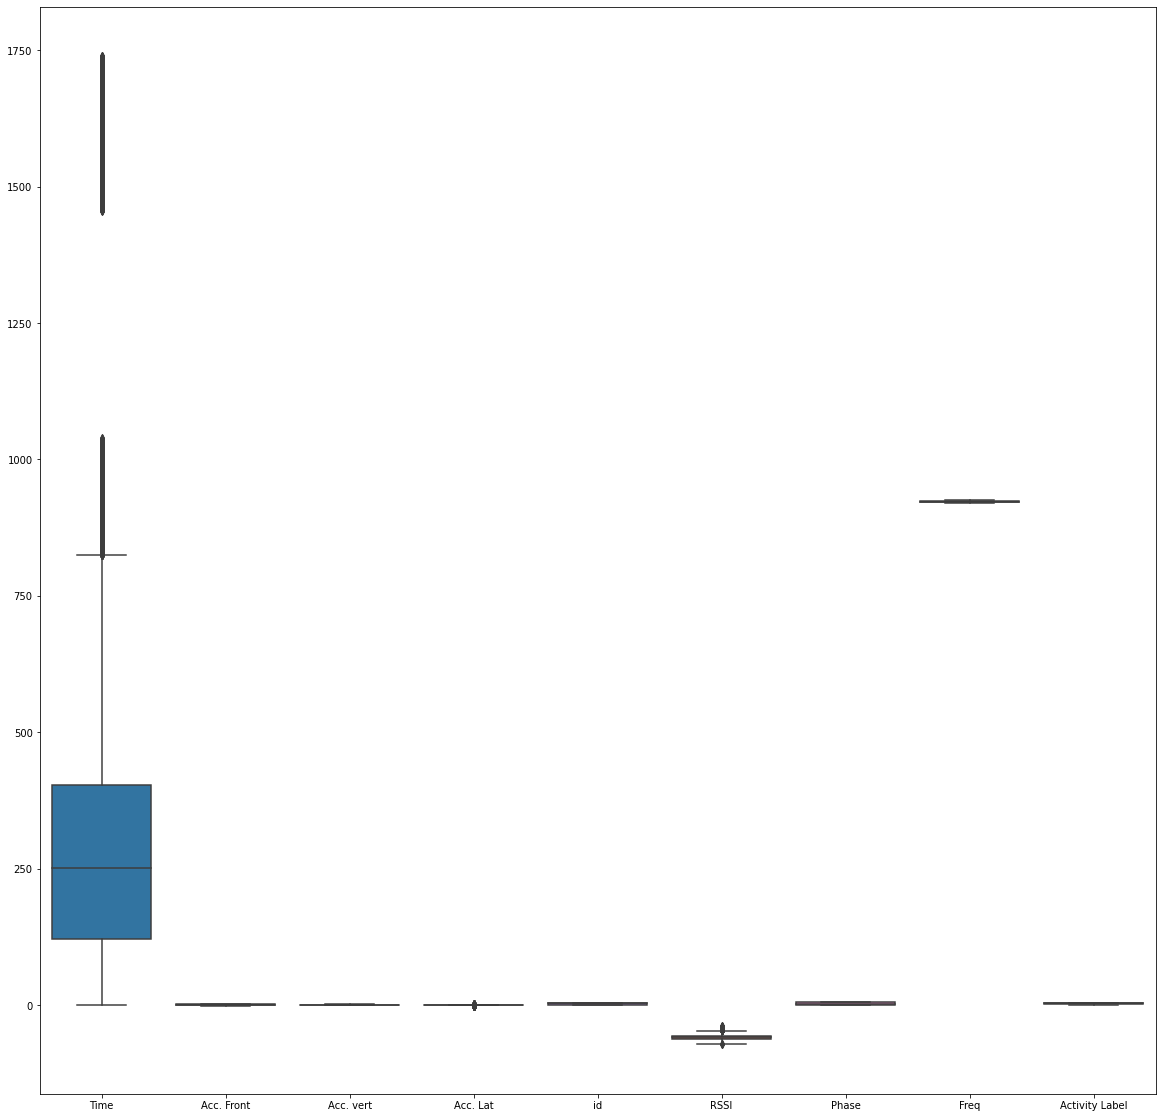

In [12]:
fig ,ax  = plt.subplots(figsize = (20,20))
sns.boxplot(data = df1 , ax = ax)

In [13]:
# Checking if there is any null values
df1.isnull().values.any()


False

In [14]:
y = df1['Activity Label'] 

In [15]:
x = df1.drop(columns=['Activity Label'])

In [16]:
x

Time  Acc. Front  Acc. vert  Acc. Lat  id  RSSI    Phase    Freq
0        0.000    0.096148    1.01970 -0.196130   1 -42.5  2.05550  924.25
1        0.025    0.096148    1.01970 -0.196130   1 -42.5  2.05550  924.25
2        0.050    0.096148    1.01970 -0.196130   1 -42.5  2.05550  924.25
3        0.075    0.096148    1.01970 -0.196130   1 -42.5  2.05550  924.25
4        0.100    0.096148    1.01970 -0.196130   1 -42.5  2.05550  924.25
...        ...         ...        ...       ...  ..   ...      ...     ...
75123  469.500    0.987280    0.66373  0.077541   1 -59.0  1.16280  921.25
75124  479.750    0.987280    0.66373  0.077541   1 -59.5  0.60132  922.25
75125  489.500    0.987280    0.66373  0.077541   1 -60.0  0.28225  922.25
75126  497.750    0.987280    0.66373  0.077541   1 -59.5  1.46800  920.75
75127  513.500    0.858300    0.66373 -0.025087   3 -64.0  4.78600  921.25

[75128 rows x 8 columns]

In [18]:
y

0        4
1        4
2        4
3        4
4        4
        ..
75123    2
75124    2
75125    2
75126    2
75127    4
Name: Activity Label, Length: 75128, dtype: int64

In [27]:
x

array([[ 0.00000000e+00,  1.03917940e-04,  1.10210430e-03, ...,
        -4.59345225e-02,  2.22160967e-03,  9.98940762e-01],
       [ 2.70203073e-05,  1.03917940e-04,  1.10210429e-03, ...,
        -4.59345224e-02,  2.22160967e-03,  9.98940761e-01],
       [ 5.40406146e-05,  1.03917940e-04,  1.10210429e-03, ...,
        -4.59345224e-02,  2.22160966e-03,  9.98940760e-01],
       ...,
       [ 4.68049852e-01,  9.44016869e-04,  6.34645001e-04, ...,
        -5.73707683e-02,  2.69881656e-04,  8.81836518e-01],
       [ 4.74784494e-01,  9.41728248e-04,  6.33106403e-04, ...,
        -5.67547512e-02,  1.40026848e-03,  8.78267851e-01],
       [ 4.85969011e-01,  8.12282769e-04,  6.28144521e-04, ...,
        -6.05686790e-02,  4.52940153e-03,  8.71857743e-01]])

In [28]:
scalar = StandardScaler()
ProfileReport(pd.DataFrame(scalar.fit_transform(x)))
X_scaled = scalar.fit_transform(x)

In [29]:
df_new_scalar = pd.DataFrame(scalar.fit_transform(x))
fig ,ax  = plt.subplots(figsize = (20,20))
sns.boxplot(data = x , ax = ax)

<AxesSubplot:>

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=.20, random_state=144)

In [42]:
x_train

array([[ 4.70462464e-01,  2.37216145e-04,  2.60806068e-04, ...,
        -5.67799525e-02,  5.87887223e-03,  8.80566407e-01],
       [ 4.66919024e-01,  1.19201962e-03,  1.51702015e-04, ...,
        -5.79161475e-02,  3.92231126e-03,  8.82383620e-01],
       [ 2.78832783e-01,  3.68217328e-04,  1.00062651e-03, ...,
        -5.97907328e-02,  2.76108405e-03,  9.58471442e-01],
       ...,
       [ 1.98389209e-02,  9.67294899e-04,  1.59122761e-04, ...,
        -5.19655226e-02,  2.92782416e-03,  9.98441735e-01],
       [ 4.69016878e-01,  1.03427669e-03, -2.41688391e-05, ...,
        -5.69230071e-02,  7.10293893e-04,  8.81349921e-01],
       [ 4.84929431e-01,  9.97299691e-04, -2.38226003e-05, ...,
        -5.98794728e-02,  6.65397675e-05,  8.72495782e-01]])

In [44]:
## going for Logistic Regression
lr=LogisticRegression()
estimator={'solver':('newton-cg','liblinear','lbfgs','sag')}
gsc=GridSearchCV(lr,estimator)
gsc.fit(x_train,y_train)
y_gsc_pred=gsc.predict(x_test)
print("accuracy gsc= ",accuracy_score(y_test,y_gsc_pred))
print(gsc.best_estimator_)


/Users/ekcs011/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ekcs011/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

accuracy gsc=  0.6852122986822841
LogisticRegression(solver='newton-cg')


In [46]:
# Going for KNN
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(X_test)
print("accuracy KNN= ",accuracy_score(y_test,y_pred_knn))


accuracy KNN=  0.46892053773459336


In [49]:
# Going for Random Forest
rforest=RandomForestClassifier()
rforest.fit(x_train,y_train)
y_pred_rforest=rforest.predict(x_test)
print("accuracy Random Forest= ",accuracy_score(y_test,y_pred_rforest))


accuracy Random Forest=  0.9906162651404232


In [52]:
## # Going for Decion Tree
dtree= DecisionTreeClassifier()
dtree.fit(x_train,y_train)
y_pred_dtree=dtree.predict(x_test)
print("accuracy Decion Tree= ",accuracy_score(y_test,y_pred_dtree))




accuracy Decion Tree=  0.9858245707440436


In [1]:
pwd

'/Users/ekcs011'